In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
df=pd.read_csv("data\diabetes_012_health_indicators.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
for col in df.columns:
    print(col, ": ", df[col].unique())

Diabetes_012 :  [0. 2. 1.]
HighBP :  [1. 0.]
HighChol :  [1. 0.]
CholCheck :  [1. 0.]
BMI :  [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker :  [1. 0.]
Stroke :  [0. 1.]
HeartDiseaseorAttack :  [0. 1.]
PhysActivity :  [0. 1.]
Fruits :  [0. 1.]
Veggies :  [1. 0.]
HvyAlcoholConsump :  [0. 1.]
AnyHealthcare :  [1. 0.]
NoDocbcCost :  [0. 1.]
GenHlth :  [5. 3. 2. 4. 1.]
MentHlth :  [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth :  [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk :  [1. 0.]
Sex :  [0. 1.]
Age :  [ 9.  7. 11

In [ ]:
'''
"Diabetes_012": 0 = no diabetes, 1 = prediabetes, 2 = diabetes
"HighBP": 0 = no high blood pressure, 1 = high blood pressure
"HighChol": 0 = no high cholesterol, 1 = high cholesterol
"CholCheck": 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
"BMI": Body Mass Index (continuous values 12-98)
"Smoker": 0 = smoked <100 cigarettes, 1 = smoked ≥100 cigarettes
"Stroke": 0 = no stroke, 1 = had stroke
"HeartDiseaseorAttack": 0 = no CHD/MI, 1 = has CHD or MI
"PhysActivity": 0 = no physical activity, 1 = yes physical activity
"Fruits": 0 = consumes fruit <1x/day, 1 = consumes fruit ≥1x/day
"Veggies": 0 = consumes vegetables <1x/day, 1 = consumes vegetables ≥1x/day
"HvyAlcoholConsump": 0 = not heavy drinker, 1 = heavy drinker
"AnyHealthcare": 0 = no healthcare coverage, 1 = has healthcare coverage
"NoDocbcCost": 0 = could afford doctor, 1 = couldn't afford doctor
"GenHlth": 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
"MentHlth": scale 0-30 days (mental health not good)
"PhysHlth": scale 0-30 days (physical health not good)
"DiffWalk": 0 = no difficulty walking, 1 = difficulty walking
"Sex": 0 = female, 1 = male
"Age": 1 = 18-24, 9 = 60-64, 13 = 80+

"Education": 1 = Never attended school, 6 = College graduate
"Income":  scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [7]:
def PieChart(column_name,df):

  data = df[column_name].value_counts()

  # Plot pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

  # Add title
  plt.title(f"Distribution of {column_name}")

  # Show plot
  plt.show()



In [8]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

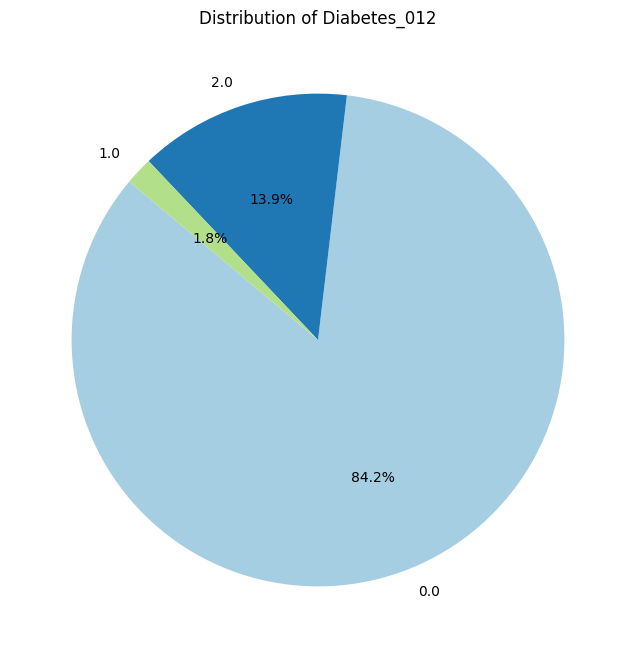

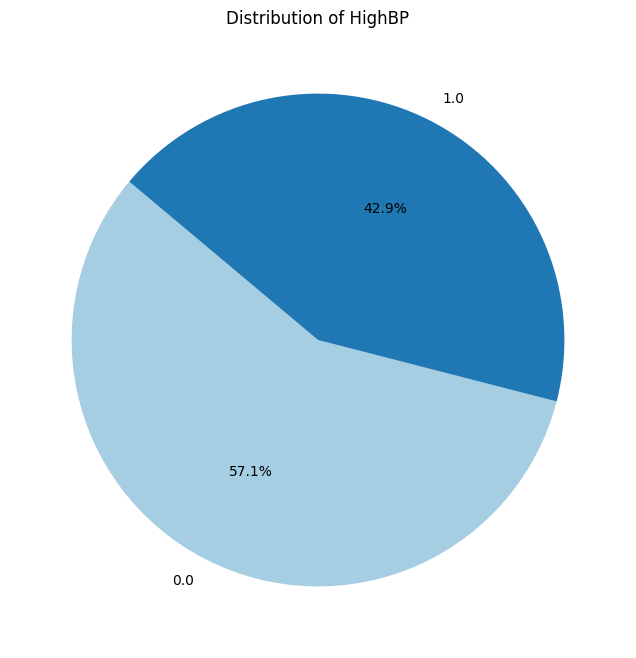

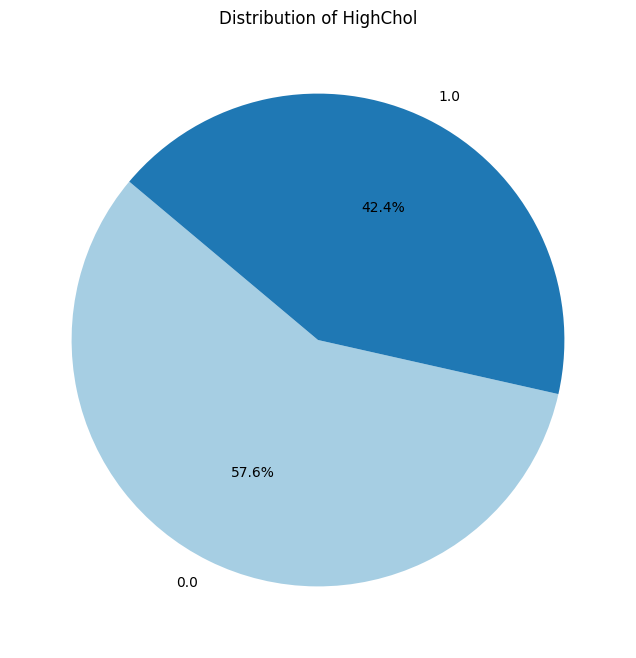

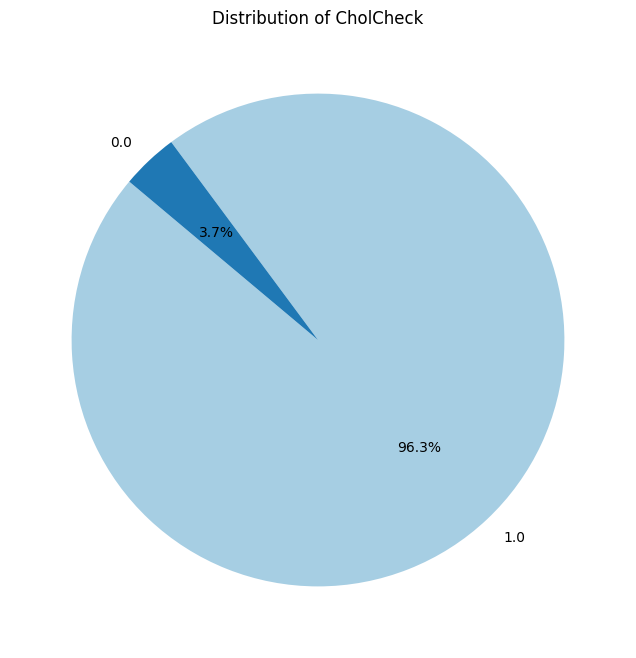

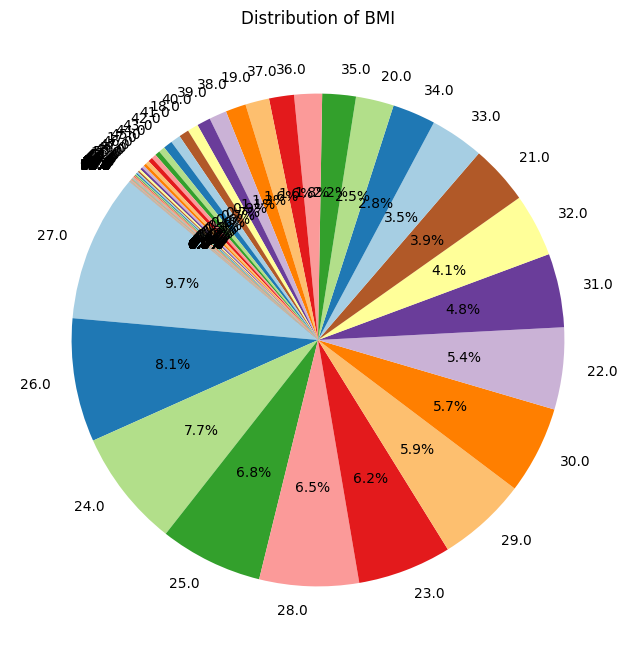

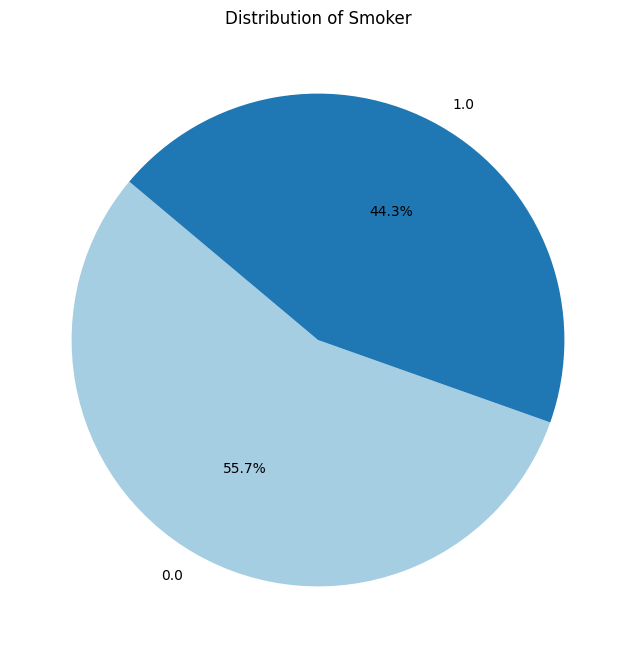

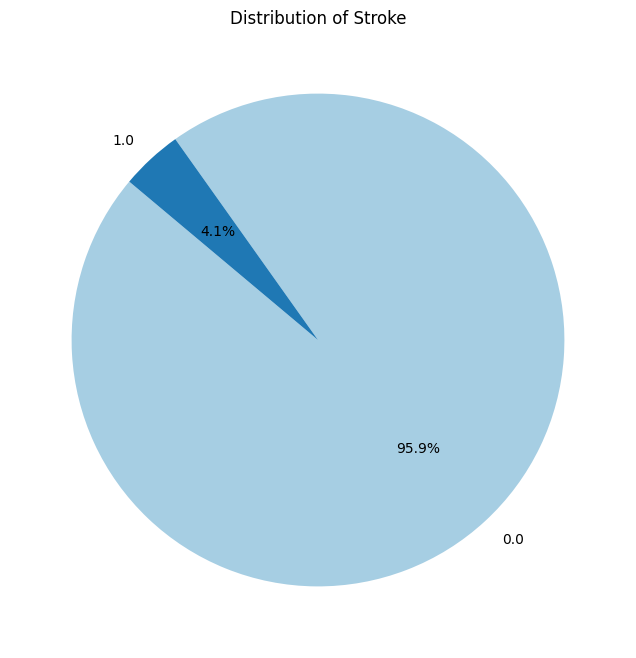

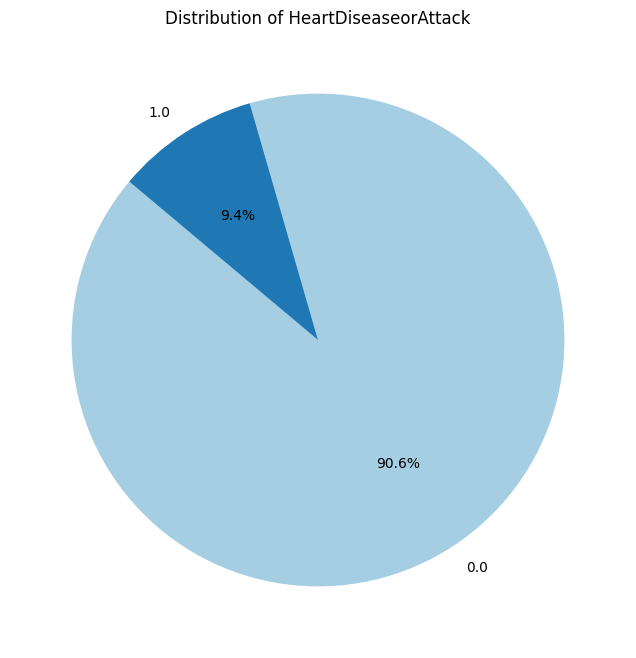

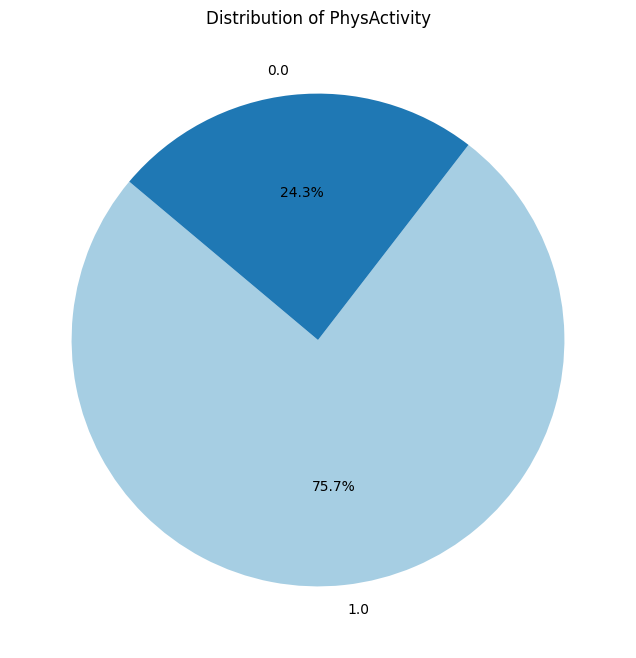

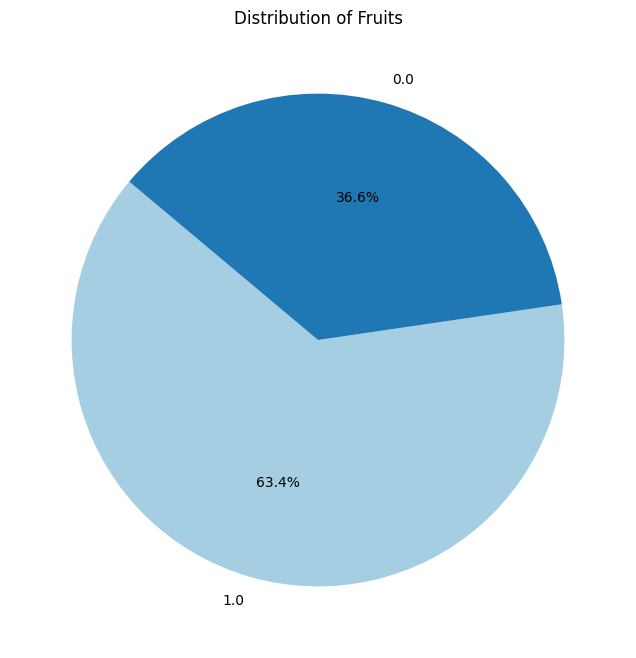

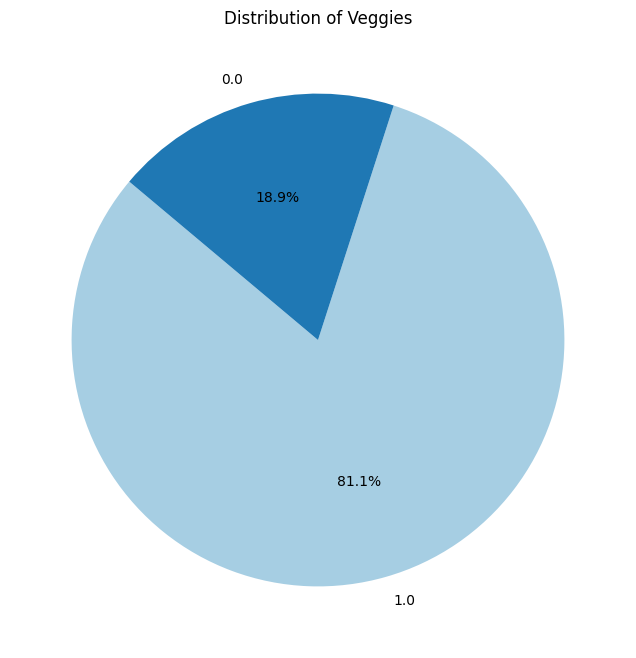

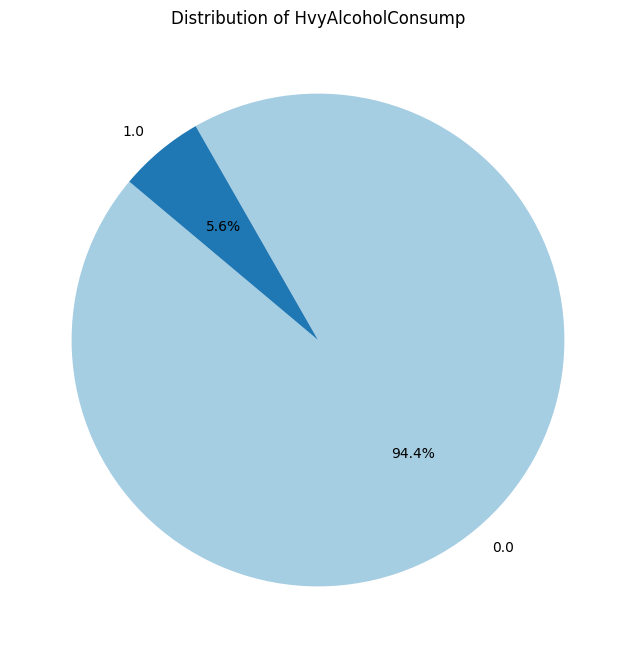

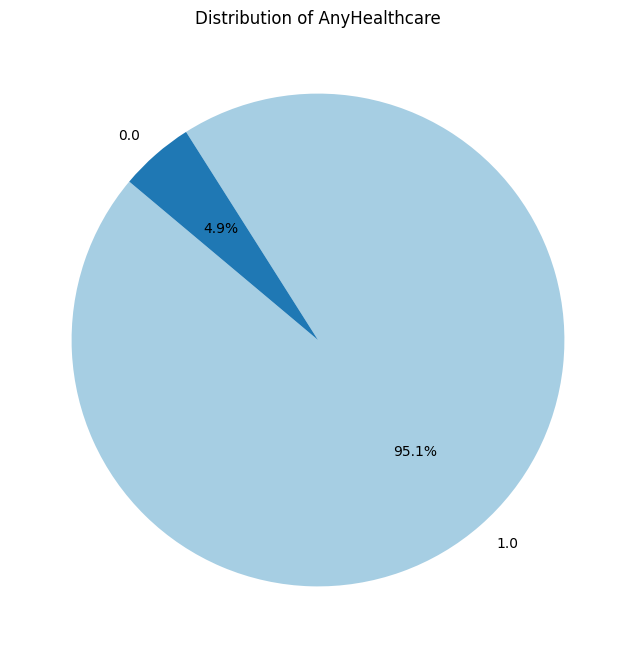

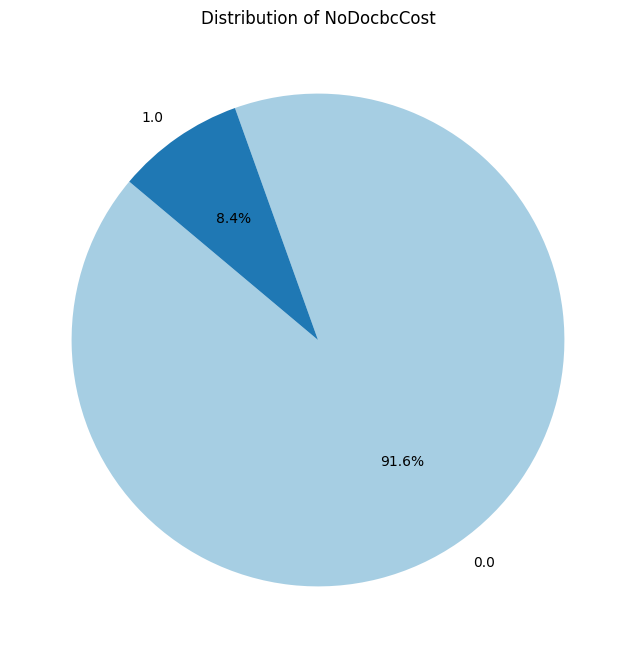

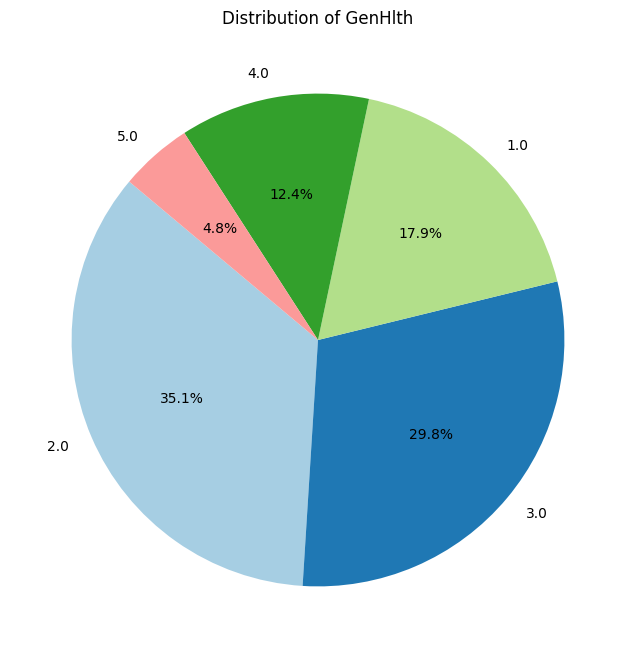

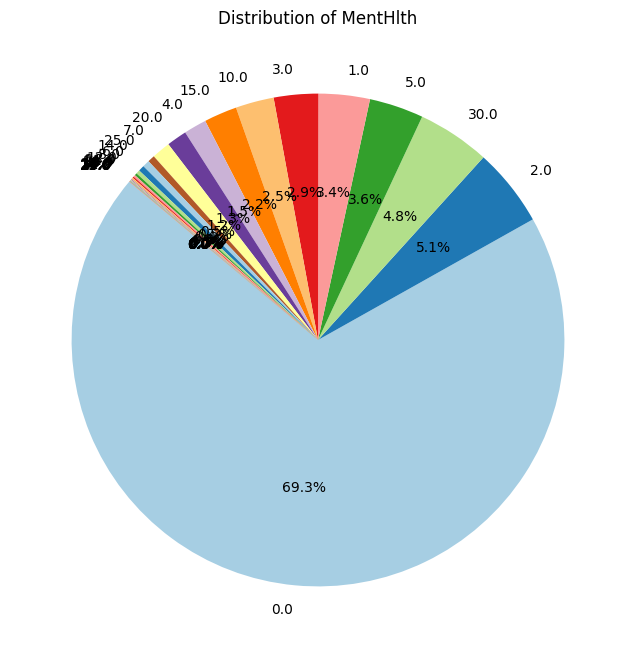

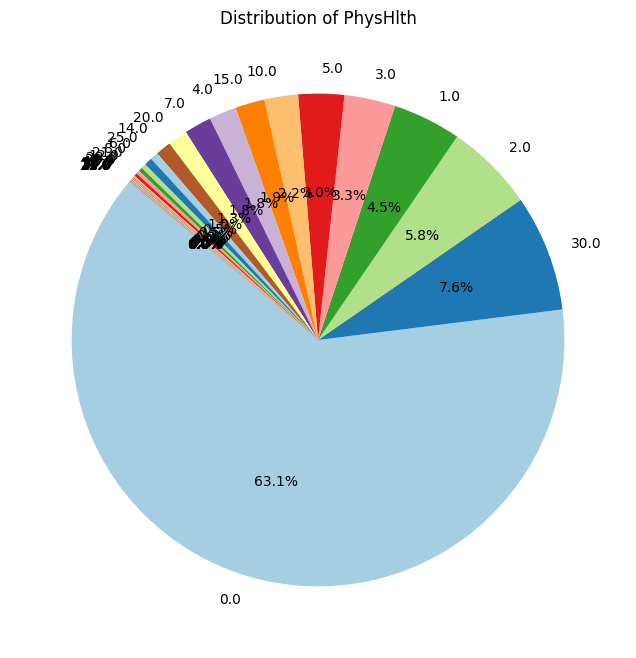

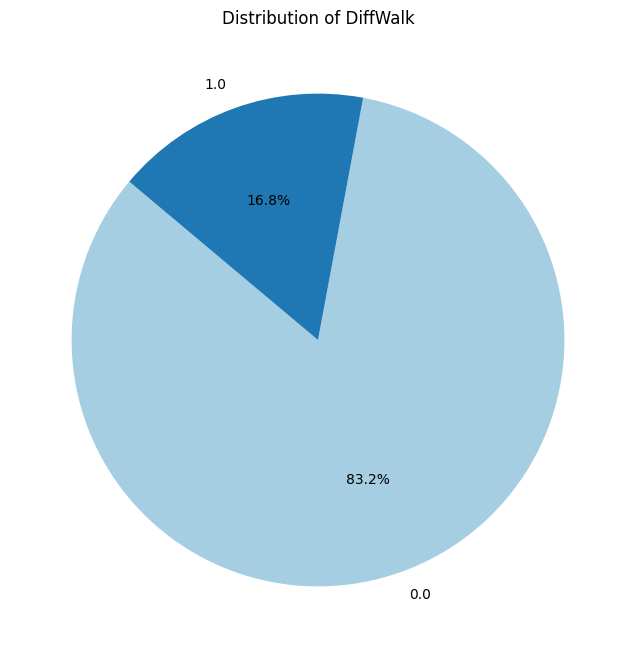

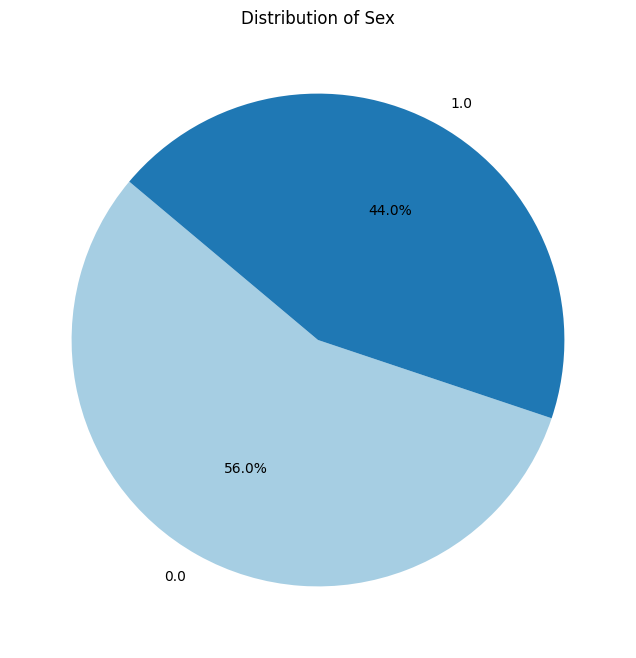

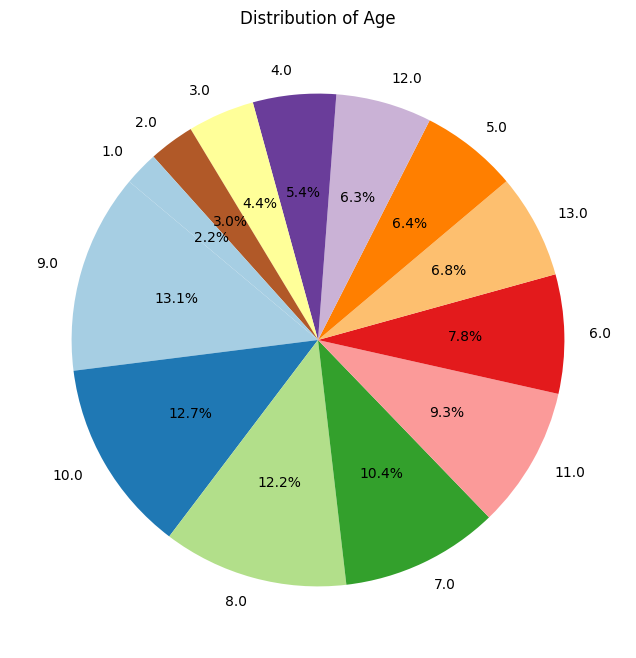

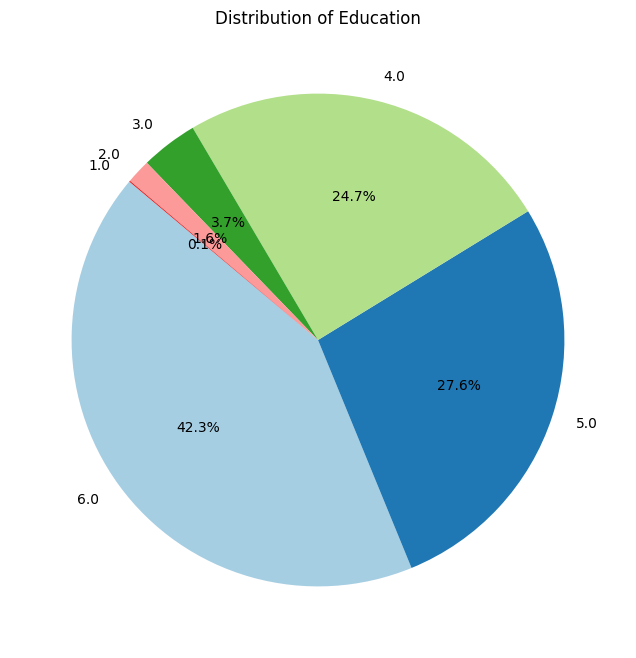

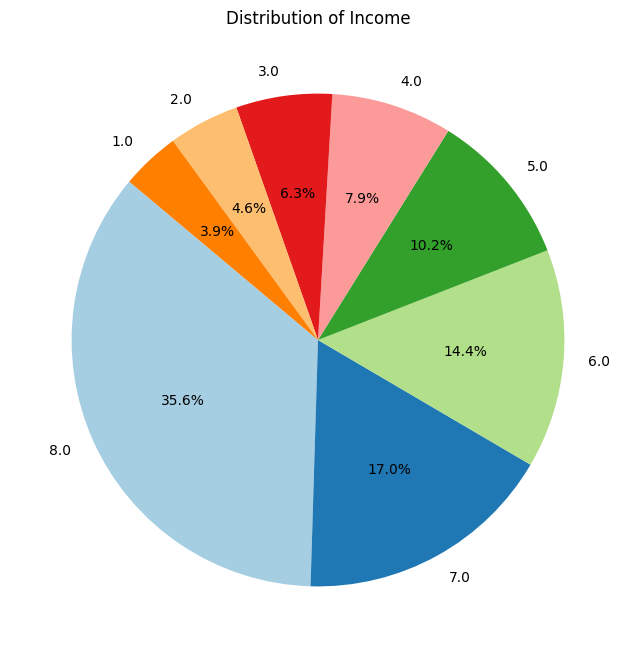

In [9]:
coulmns=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
for column in coulmns:
  PieChart(column,df)

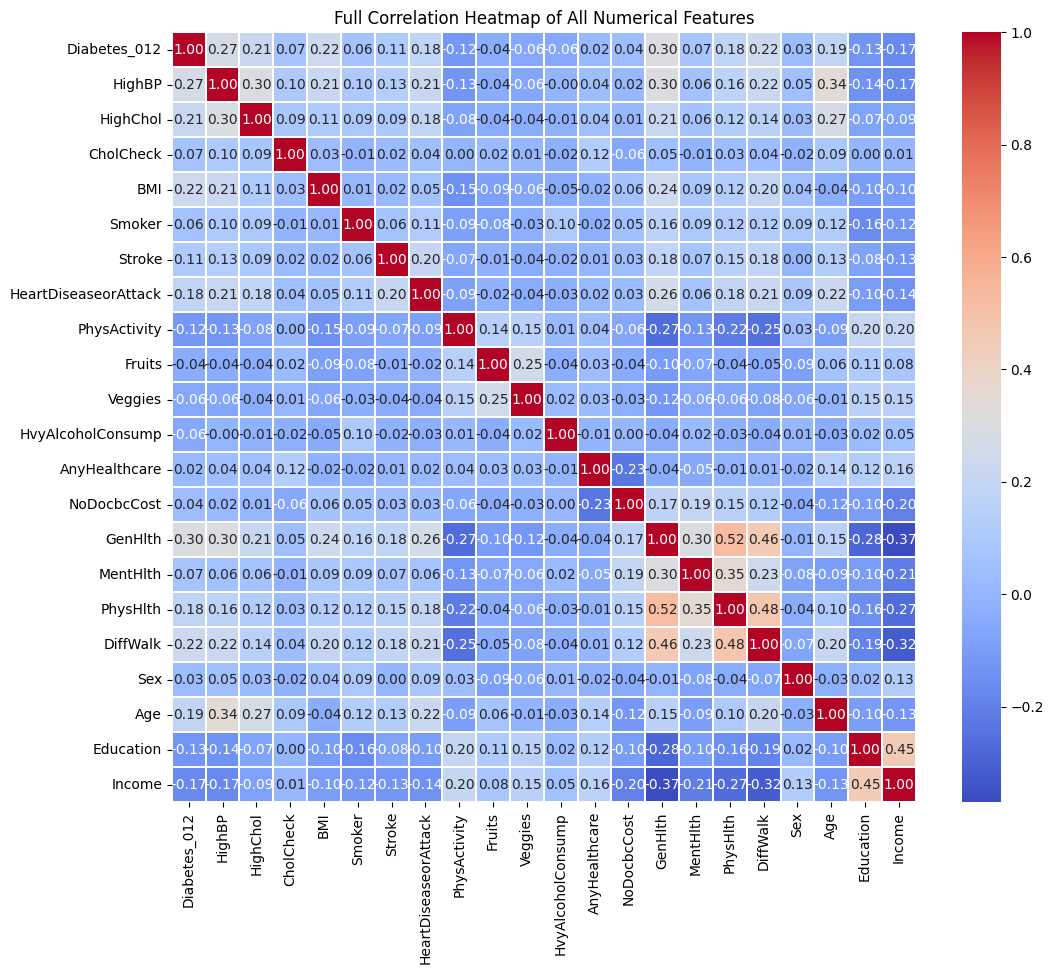

In [11]:
corr_matrix = df.corr()  # Ensure only numerical columns are considered

# Plot the full correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.3)
plt.title("Full Correlation Heatmap of All Numerical Features")
plt.show()

In [12]:
#removing columns that aren't relevant to calculations
df = df.drop(['Education', 'Income'], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
x = df.drop(columns='Diabetes_012')
y = df['Diabetes_012']

# Разделение на train/test ДО нормализации (сохраняем распределение классов)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Определим типы признаков
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
               
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']  # Полностью числовые
ordinal_cols = ['GenHlth', 'Age']  # Порядковые категории

# Обработка разных типов признаков:
# Бинарные - оставляем как есть
# Числовые - StandardScaler
std_scaler = StandardScaler()
x_train[numeric_cols] = std_scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = std_scaler.transform(x_test[numeric_cols])

# Порядковые - MinMaxScaler [0,1]
minmax_scaler = MinMaxScaler()
x_train[ordinal_cols] = minmax_scaler.fit_transform(x_train[ordinal_cols])
x_test[ordinal_cols] = minmax_scaler.transform(x_test[ordinal_cols])

# Результат:
print("Обработанные признаки:")
x_train.head()

Обработанные признаки:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
185494,1.0,0.0,1.0,-0.512552,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,-0.429290,-0.485961,0.0,1.0,0.750000
217030,0.0,0.0,1.0,1.301115,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.00,-0.429290,-0.485961,0.0,0.0,0.000000
641,1.0,1.0,1.0,0.998837,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.25,-0.429290,-0.485961,0.0,0.0,0.833333
217863,0.0,0.0,1.0,-0.210274,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.25,-0.429290,0.088138,0.0,1.0,0.166667
53677,0.0,0.0,1.0,-0.059135,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.50,-0.023967,-0.485961,0.0,0.0,0.666667


In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("="*60)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

# 2. Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

print("="*60)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}\n")

# 3. XGBoost
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss', scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print("="*60)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n")


# 5. LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)

print("="*60)
print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}\n")

# 6. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print("="*60)
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}\n")

# 7. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

print("="*60)
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}\n")

Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42741
         1.0       0.06      0.01      0.01       926
         2.0       0.44      0.22      0.29      7069

    accuracy                           0.83     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.79      0.83      0.81     50736

Accuracy: 0.8348

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.25      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Accuracy: 0.8451



C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

XGBoost Results:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736

Accuracy: 0.8480



C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 19
[LightGBM] [Info] Start training from score -0.171489
[LightGBM] [Info] Start training from score -4.003247
[LightGBM] [Info] Start training from score -1.970881
LightGBM Results:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Accuracy: 0.8490



C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Полина\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

KNN Results:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     42741
         1.0       0.07      0.00      0.01       926
         2.0       0.40      0.21      0.27      7069

    accuracy                           0.83     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.83      0.80     50736

Accuracy: 0.8300

Gradient Boosting Results:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736

Accuracy: 0.8484



In [ ]:
df=pd.read_csv("data\diabetes_012_health_indicators.csv")
#removing columns that aren't relevant to calculations
df = df.drop(['Education', 'Income'], axis=1)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
x = df.drop(columns='Diabetes_012')
y = df['Diabetes_012']

# Разделение на train/test ДО нормализации (сохраняем распределение классов)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Определим типы признаков
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
               
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']  # Полностью числовые
ordinal_cols = ['GenHlth', 'Age']  # Порядковые категории

# Обработка разных типов признаков:
# Бинарные - оставляем как есть
# Числовые - StandardScaler
std_scaler = StandardScaler()
x_train[numeric_cols] = std_scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = std_scaler.transform(x_test[numeric_cols])

# Порядковые - MinMaxScaler [0,1]
minmax_scaler = MinMaxScaler()
x_train[ordinal_cols] = minmax_scaler.fit_transform(x_train[ordinal_cols])
x_test[ordinal_cols] = minmax_scaler.transform(x_test[ordinal_cols])

# 5. LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)

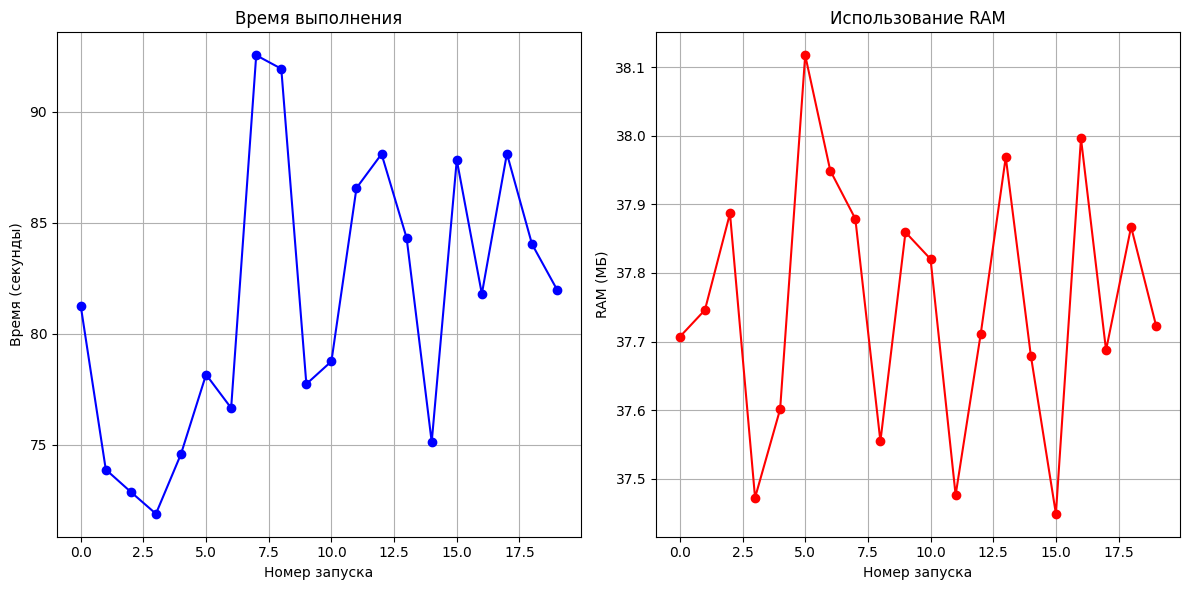

Среднее время: 81.41 сек
Максимальное время: 92.54 сек
Минимальное время: 71.90 сек

Средний RAM: 37.76 МБ
Максимальный RAM: 38.12 МБ
Минимальный RAM: 37.45 МБ


In [3]:
import matplotlib.pyplot as plt
import re

# Чтение данных из файла
with open('logs/log_DataNodes_1_opt_False.txt', 'r') as f:
    data = f.readlines()

# Извлечение значений времени и RAM
times = []
rams = []
for line in data:
    time_match = re.search(r'Time: (\d+\.\d+) seconds', line)
    ram_match = re.search(r'RAM: (\d+\.\d+) Mb', line)
    if time_match and ram_match:
        times.append(float(time_match.group(1)))
        rams.append(float(ram_match.group(1)))

# Создание графиков
plt.figure(figsize=(12, 6))

# График времени выполнения
plt.subplot(1, 2, 1)
plt.plot(times, 'b-o')
plt.title('Время выполнения')
plt.xlabel('Номер запуска')
plt.ylabel('Время (секунды)')
plt.grid(True)

# График использования RAM
plt.subplot(1, 2, 2)
plt.plot(rams, 'r-o')
plt.title('Использование RAM')
plt.xlabel('Номер запуска')
plt.ylabel('RAM (МБ)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод статистики
print(f"Среднее время: {sum(times)/len(times):.2f} сек")
print(f"Максимальное время: {max(times):.2f} сек")
print(f"Минимальное время: {min(times):.2f} сек")
print(f"\nСредний RAM: {sum(rams)/len(rams):.2f} МБ")
print(f"Максимальный RAM: {max(rams):.2f} МБ")
print(f"Минимальный RAM: {min(rams):.2f} МБ")

Доступные стили графиков: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Успешно загружено: log_DataNodes_1_opt_False.txt
Успешно загружено: log_DataNodes_1_opt_True.txt
Успешно загружено: log_DataNodes_3_opt_False.txt
Успешно загружено: log_DataNodes_3_opt_True.txt

Конфигурация                   Ср. время    Макс. время  Мин. время   Ср. RAM      Макс. RAM   
------------------------------------------------------------------------------------------
log_DataNodes_1_op

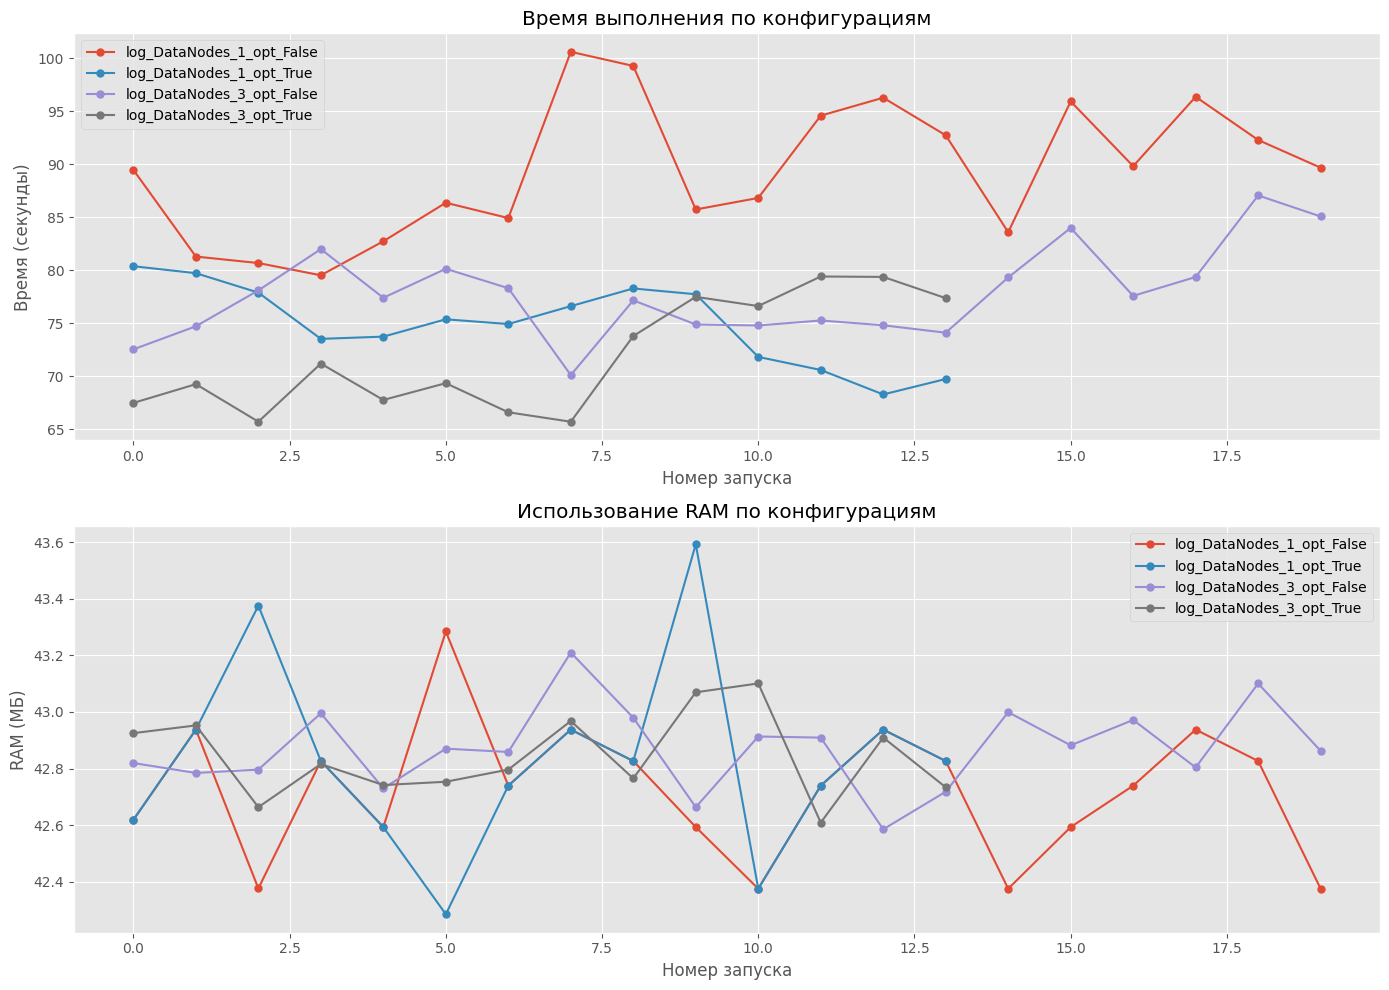

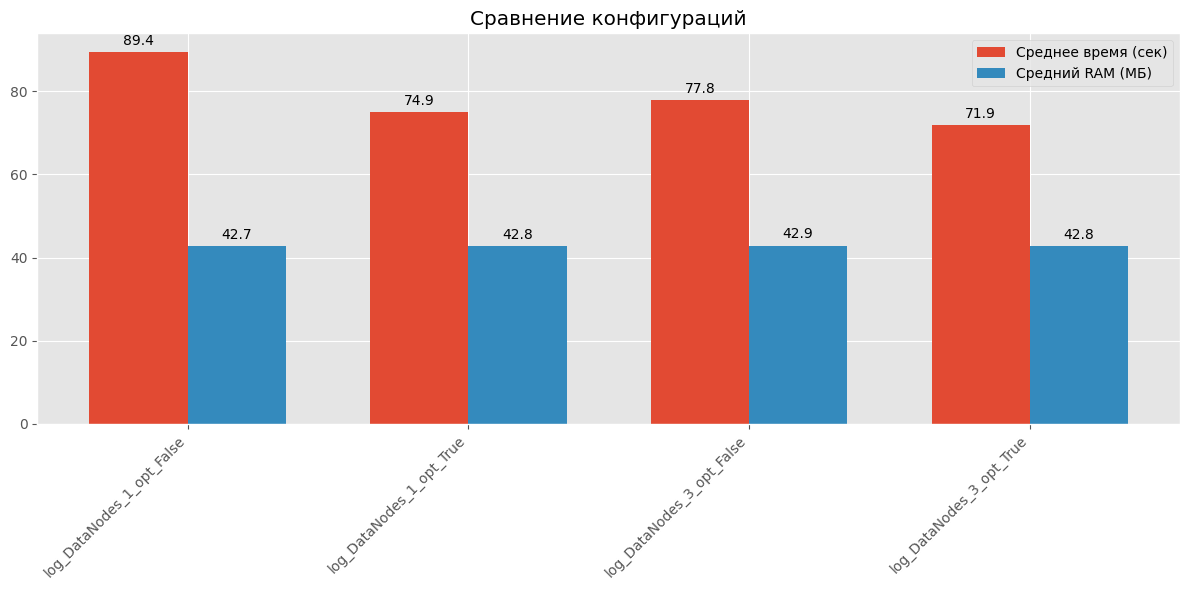

In [8]:
import matplotlib.pyplot as plt
import re
import numpy as np
import os

# Настройка стиля графиков (используем доступный стиль)
plt.style.use('ggplot')  # Вместо 'seaborn' используем 'ggplot' или другой доступный стиль
plt.rcParams['figure.figsize'] = (14, 8)

# Проверка доступных стилей
print("Доступные стили графиков:", plt.style.available)

# Функция для чтения данных из файла
def parse_log_file(filepath):
    times = []
    rams = []
    with open(filepath, 'r') as f:
        for line in f:
            time_match = re.search(r'Time: (\d+\.\d+) seconds', line)
            ram_match = re.search(r'RAM: (\d+\.\d+) Mb', line)
            if time_match and ram_match:
                times.append(float(time_match.group(1)))
                rams.append(float(ram_match.group(1)))
    return times, rams

# Собираем все данные
data = {}
log_dir = 'logs'  # Убедитесь, что папка logs существует
for filename in os.listdir(log_dir):
    if filename.endswith('.txt'):
        key = filename.replace('.txt', '')
        filepath = os.path.join(log_dir, filename)
        try:
            data[key] = parse_log_file(filepath)
            print(f"Успешно загружено: {filename}")
        except Exception as e:
            print(f"Ошибка при загрузке {filename}: {str(e)}")

# Проверяем, есть ли данные для построения графиков
if not data:
    print("Нет данных для построения графиков. Проверьте файлы в папке logs.")
else:
    # Создаем графики
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # График времени выполнения
    for label, (times, rams) in data.items():
        ax1.plot(times, 'o-', label=label, markersize=5)
    ax1.set_title('Время выполнения по конфигурациям')
    ax1.set_xlabel('Номер запуска')
    ax1.set_ylabel('Время (секунды)')
    ax1.legend()
    ax1.grid(True)

    # График использования RAM
    for label, (times, rams) in data.items():
        ax2.plot(rams, 'o-', label=label, markersize=5)
    ax2.set_title('Использование RAM по конфигурациям')
    ax2.set_xlabel('Номер запуска')
    ax2.set_ylabel('RAM (МБ)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()

    # Сводная статистика
    print("\n{:<30} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
        "Конфигурация", "Ср. время", "Макс. время", "Мин. время", "Ср. RAM", "Макс. RAM"))
    print("-" * 90)

    for label, (times, rams) in data.items():
        print("{:<30} {:<12.2f} {:<12.2f} {:<12.2f} {:<12.2f} {:<12.2f}".format(
            label,
            np.mean(times),
            max(times),
            min(times),
            np.mean(rams),
            max(rams)
        ))

    plt.show()

    # Дополнительный анализ - сравнение средних значений
    configs = sorted(data.keys())
    avg_times = [np.mean(data[c][0]) for c in configs]
    avg_rams = [np.mean(data[c][1]) for c in configs]

    x = np.arange(len(configs))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, avg_times, width, label='Среднее время (сек)')
    rects2 = ax.bar(x + width/2, avg_rams, width, label='Средний RAM (МБ)')

    ax.set_title('Сравнение конфигураций')
    ax.set_xticks(x)
    ax.set_xticklabels(configs, rotation=45, ha='right')
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.1f')
    ax.bar_label(rects2, padding=3, fmt='%.1f')

    plt.tight_layout()
    plt.show()

-- Использование оптимизаций ускорило работу на 6-15 секунд.
-- Использование большего числа DataNodes ускорило работу на 3-12 секунд.
-- Значения используемой RAM у всех вариантов оказались практически одинаковыми.